In [49]:
# Import dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from xgboost.sklearn import XGBClassifier  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the CSV and Perform Basic Data Cleaning

In [25]:
# Rean in data and drop the columns where all values are null
df = pd.read_csv("exoplanet_data.csv")

df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [26]:
# Check DF shape
df.shape

(6991, 41)

In [27]:
# Check DF Dtypes
df.dtypes

koi_disposition       object
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq                int64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr        float64
koi_tce_plnt_num       int64
koi_steff              int64
koi_steff_err1         int64
koi_steff_err2         int64
koi_slogg            float64
koi_slogg_err1       float64
koi_slogg_err2

In [28]:
# Assign the features and target to X and y abd check assignments
raw_data = df.values
X = raw_data[:, 1:42]
y = raw_data[:, 0]

print(X, y)

[[0 0 0 ... 291.93422999999996 48.141651 15.347000000000001]
 [0 1 0 ... 297.00482 48.134128999999994 15.436]
 [0 1 0 ... 285.53461 48.28521 15.597000000000001]
 ...
 [0 0 0 ... 286.50937000000005 47.163219 14.757]
 [0 0 1 ... 294.16489 47.176281 15.385]
 [0 0 1 ... 297.00977 47.121021 14.825999999999999]] ['CONFIRMED' 'FALSE POSITIVE' 'FALSE POSITIVE' ... 'CANDIDATE'
 'FALSE POSITIVE' 'FALSE POSITIVE']


# Split data and scale features

In [29]:
# Create the train and test sets for the features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
# Scale the features using the MinMax scaler since we know their values
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Encode the target

In [31]:
# Encode the target for the train and test set so it can be fed into our NN and conver to a vector and check it
label_encoder = LabelEncoder()
label_encoder.fit(y_train)


encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

encoded_y_train

array([0, 2, 2, ..., 2, 2, 2])

In [32]:
# Convert encoded targets to one-hot-encoding and check it
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

y_train_categorical

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

# Automated Feature Selection

In [33]:
# Create and fit XGB gradient boosting model to start the automated feature selection
feature_selection_model = XGBClassifier(n_estimators=300)

feature_selection_model.fit(X_train_scaled, encoded_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [34]:
# Run the feature importance function of the XGB Classifier to rank our features
feature_importance = feature_selection_model.feature_importances_

feature_importance

array([0.20968866, 0.13427714, 0.17839007, 0.05415403, 0.01070423,
       0.0056904 , 0.        , 0.00773627, 0.00661163, 0.        ,
       0.01396741, 0.00389553, 0.00649267, 0.00856913, 0.03522527,
       0.        , 0.00645451, 0.0086452 , 0.        , 0.03141988,
       0.01123932, 0.02993376, 0.00660044, 0.0072125 , 0.01191691,
       0.00606794, 0.04755879, 0.01453775, 0.00533221, 0.08135249,
       0.01012137, 0.00274674, 0.00315716, 0.00471993, 0.00463311,
       0.00744283, 0.00502919, 0.00572958, 0.00675435, 0.00599165],
      dtype=float32)

In [35]:
# Create a list of the reature names to use below in our charting and check lenghth 
feature_names = df.columns.tolist()

feature_names.remove('koi_disposition')

len(feature_names)

40

In [36]:
# Check list
feature_names

['koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']

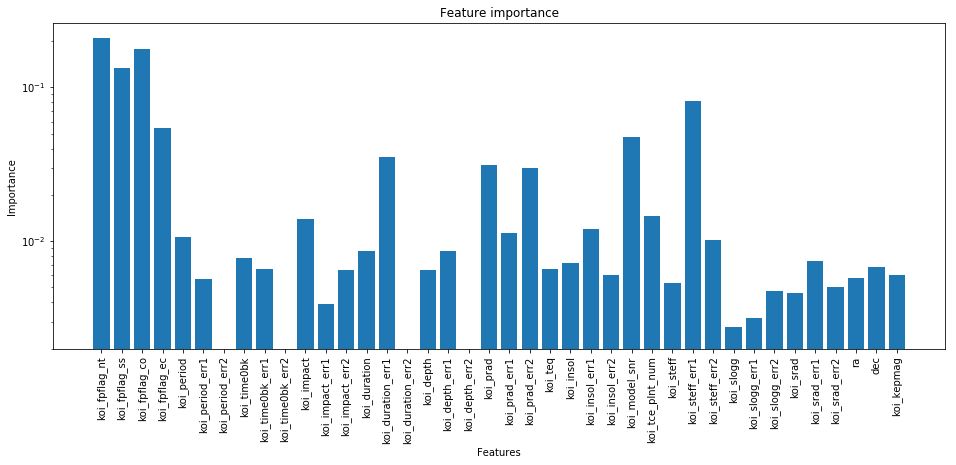

In [39]:
# Plot the figire and inspect the top features
plt.figure(figsize=(16, 6))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), feature_names, rotation='vertical')
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

# Test for multicollinearity

In [46]:
# Create df for correlation matrix to see which variable are most corrleated to the koi_disposition target
top_features_df = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_steff_err1', 'koi_fpflag_ec', 'koi_model_snr']]

top_features_df.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_steff_err1,koi_fpflag_ec,koi_model_snr
0,0,0,0,81,0,25.8
1,0,1,0,158,0,76.3
2,0,1,0,157,0,505.6
3,0,0,0,169,0,40.9
4,0,0,0,189,0,40.2


In [54]:
# Create base correlation matrix
corr_matrix = top_features_df.corr()

# Select upper triangle of correlation matrix so that I only cmpare features to other features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

upper

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_steff_err1,koi_fpflag_ec,koi_model_snr
koi_fpflag_nt,NaN,-0.241148,0.003062,0.129444,0.050790,-0.079241
koi_fpflag_ss,NaN,NaN,0.144516,0.222332,0.101695,0.439764
koi_fpflag_co,NaN,NaN,NaN,0.159761,0.538280,-0.134479
koi_steff_err1,NaN,NaN,NaN,NaN,0.120078,0.121454
koi_fpflag_ec,NaN,NaN,NaN,NaN,NaN,-0.091905
koi_model_snr,NaN,NaN,NaN,NaN,NaN,NaN


## No feature pair has hit an offensive level of correlation to one another, so will just delete one feature form the highest correlated pair.

## The variable that I and deleting is 'koi_fpflag_ec' since it is part of the highest correlated pair ('koi_fpflag_ec' vs. 'koi_fpflag_ec') and it has the lower featyre importance of the two...

In [52]:
# # Function for the magnifying feature in the below correlation matrix
# def magnify():
#     return [dict(selector="th",
#                  props=[("font-size", "16pt")]),
#             dict(selector="td",
#                  props=[('padding', "1em 1em")]),
#             dict(selector="th:hover",
#                  props=[("font-size", "25pt")]),
#             dict(selector="tr:hover td:hover",
#                  props=[('max-width', '200px'),
#                         ('font-size', '35pt')])
#             ]

In [59]:
# # Create colors for featurecorrelation mapping 
# cmap = cmap=sns.diverging_palette(20, 220, as_cmap=True)


# # Creat and print my Top Feature correlation mapping
# pretty_feature_correlation = upper.style.background_gradient(cmap, axis=1)\
#     .set_properties(**{'max-width': '35px', 'font-size': '8pt'})\
#     .set_caption("Hover to magnify")\
#     .set_precision(2)\
#     .set_table_styles(magnify())

# pretty_feature_correlation

# Create the final feature and target DFs and export them for future use with our testing models

In [60]:
# Pick five highest correlated features and test for multicullinearity
final_features = top_features_df.drop('koi_fpflag_ec', axis=1)

In [61]:
final_features.to_csv(r'C:\Users\howar\Desktop\Data Science Boot Camp\Homework Assignnments\16._Multiclasification_Exoplanet_Machine_Learning\machine-learning-challenge\Model_1\feature_df.csv', index=False)

In [62]:
target = df['koi_disposition']

In [65]:
target.to_csv(r'C:\Users\howar\Desktop\Data Science Boot Camp\Homework Assignnments\16._Multiclasification_Exoplanet_Machine_Learning\machine-learning-challenge\Model_1\target_df.csv', index=False, header=True)

# Save Auto Feature Selection model

In [67]:
import joblib
filename = 'auto_feature_selection_model.sav'
joblib.dump(feature_selection_model, filename)

['auto_feature_selection_model.sav']